In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [8]:
# Cargamos la imagen de la huella digital
ubicacion = '/content/huella.jpeg'

# Convertir la imagen a escala de grises y almacenarla en la variable 'huella'
huella = cv2.imread(ubicacion, cv2.IMREAD_GRAYSCALE)

# Vamos a invertir la imagen para que la huella sea blanca y el fondo negro
huella_invertida = cv2.bitwise_not(huella)



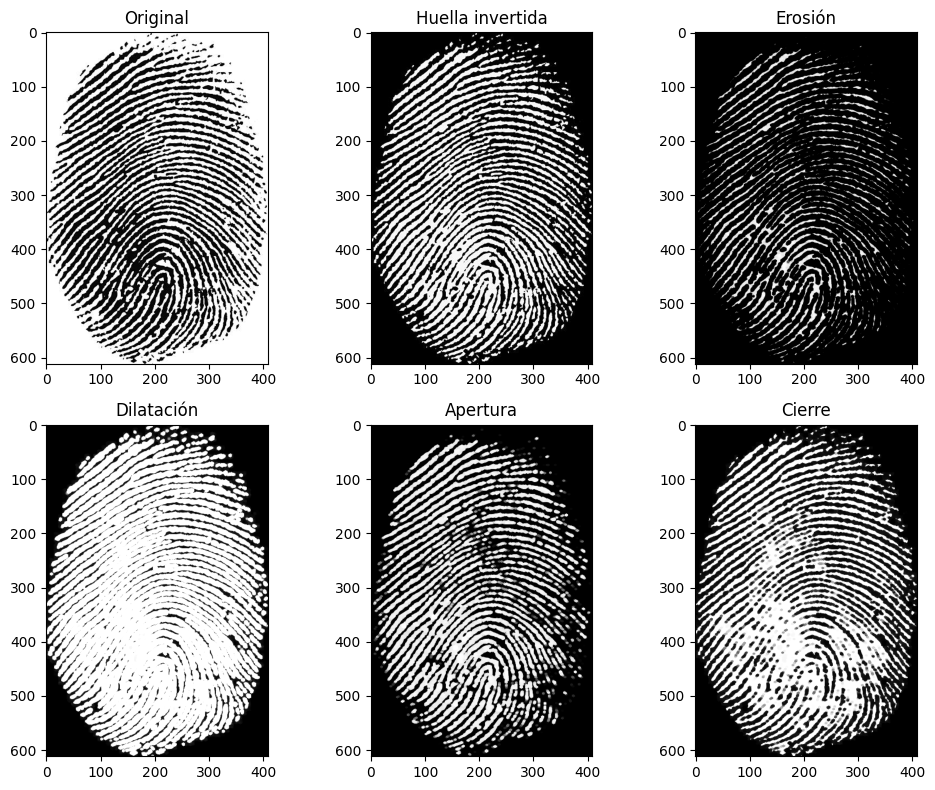

In [9]:
# Definimos el elemento estructurante como un elipse de tamaño 5x5
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

# Aplicamos la erosión para reducir los detalles de la huella
erosion = cv2.erode(huella_invertida, kernel, iterations = 1)

# Aplicamos la dilatación para ampliar los detalles de la huella
dilation = cv2.dilate(huella_invertida, kernel, iterations = 1)

# Aplicamos la apertura para suavizar los contornos internos y eliminar pequeñas imperfecciones
opening = cv2.morphologyEx(huella_invertida, cv2.MORPH_OPEN, kernel)

# Aplicamos el cierre para cerrar pequeñas brechas y agujeros en la huella
closing = cv2.morphologyEx(huella_invertida, cv2.MORPH_CLOSE, kernel)

# Mostramos las imágenes resultantes para comparar los efectos de los filtros
plt.figure(figsize=(10, 8))

plt.subplot(231), plt.imshow(huella, cmap='gray'), plt.title('Original')
plt.subplot(232), plt.imshow(huella_invertida, cmap='gray'), plt.title('Huella invertida')
plt.subplot(233), plt.imshow(erosion, cmap='gray'), plt.title('Erosión')
plt.subplot(234), plt.imshow(dilation, cmap='gray'), plt.title('Dilatación')
plt.subplot(235), plt.imshow(opening, cmap='gray'), plt.title('Apertura')
plt.subplot(236), plt.imshow(closing, cmap='gray'), plt.title('Cierre')

plt.tight_layout()
plt.show()


In [10]:
# Cargar la imagen de la radiografía dental en escala de grises
placa_ubicacion = '/content/placa.jpeg'
placa = cv2.imread(placa_ubicacion, cv2.IMREAD_GRAYSCALE)

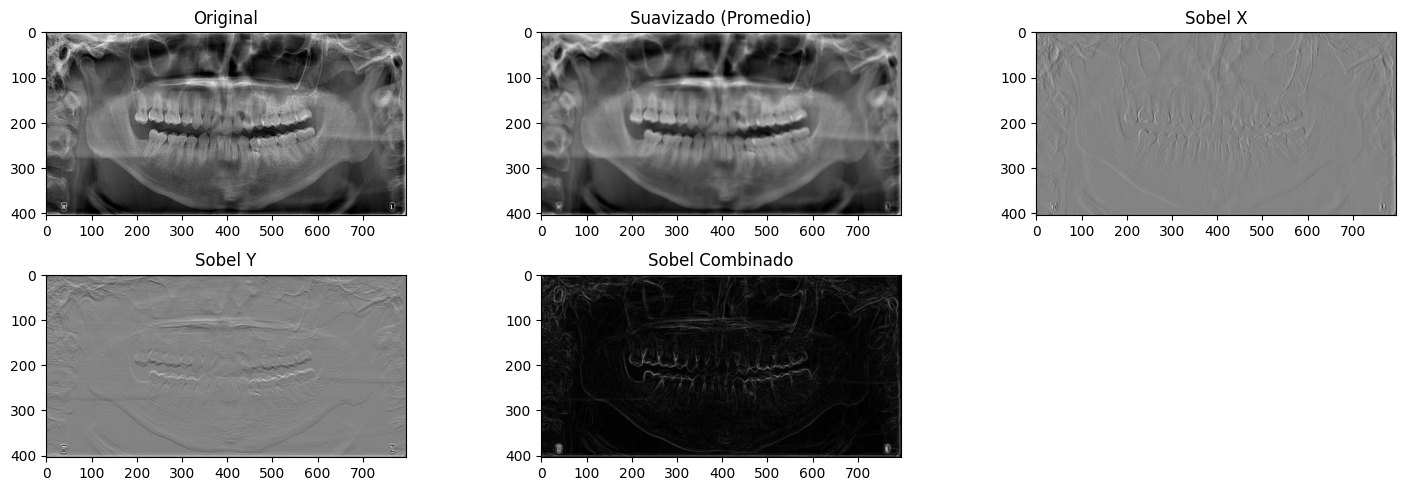

In [41]:
# Operadores espaciales

# Filtro de suavizado por promedio
# Creamos un kernel de unos, de tamaño 5x5 y luego dividimos por 25 para promediar
kernel_promedio = np.ones((5, 5), np.float32) / 25
# Aplicamos el filtro usando la función filter2D
suavizado = cv2.filter2D(placa, -1, kernel_promedio)

# Operador de Sobel para detección de bordes
# Utilizamos Sobel para detectar bordes en el eje X (dirección horizontal)
sobel_x = cv2.Sobel(placa, cv2.CV_64F, 1, 0, ksize=5)
# Utilizamos Sobel para detectar bordes en el eje Y (dirección vertical)
sobel_y = cv2.Sobel(placa, cv2.CV_64F, 0, 1, ksize=5)
# Combinamos los bordes detectados en X y Y para obtener la magnitud total de los bordes
sobel_combinado = cv2.magnitude(sobel_x, sobel_y)

# Mostramos los resultados de aplicar los diferentes operadores
plt.figure(figsize=(15, 5))

# Imagen original
plt.subplot(231), plt.imshow(placa, cmap='gray'), plt.title('Original')
# Imagen con filtro de suavizado por promedio aplicado
plt.subplot(232), plt.imshow(suavizado, cmap='gray'), plt.title('Suavizado (Promedio)')
# Imagen con operador Sobel en el eje X
plt.subplot(233), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
# Imagen con operador Sobel en el eje Y
plt.subplot(234), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Y')
plt.subplot(235), plt.imshow(sobel_combinado, cmap='gray'), plt.title('Sobel Combinado')

plt.tight_layout()
plt.show()

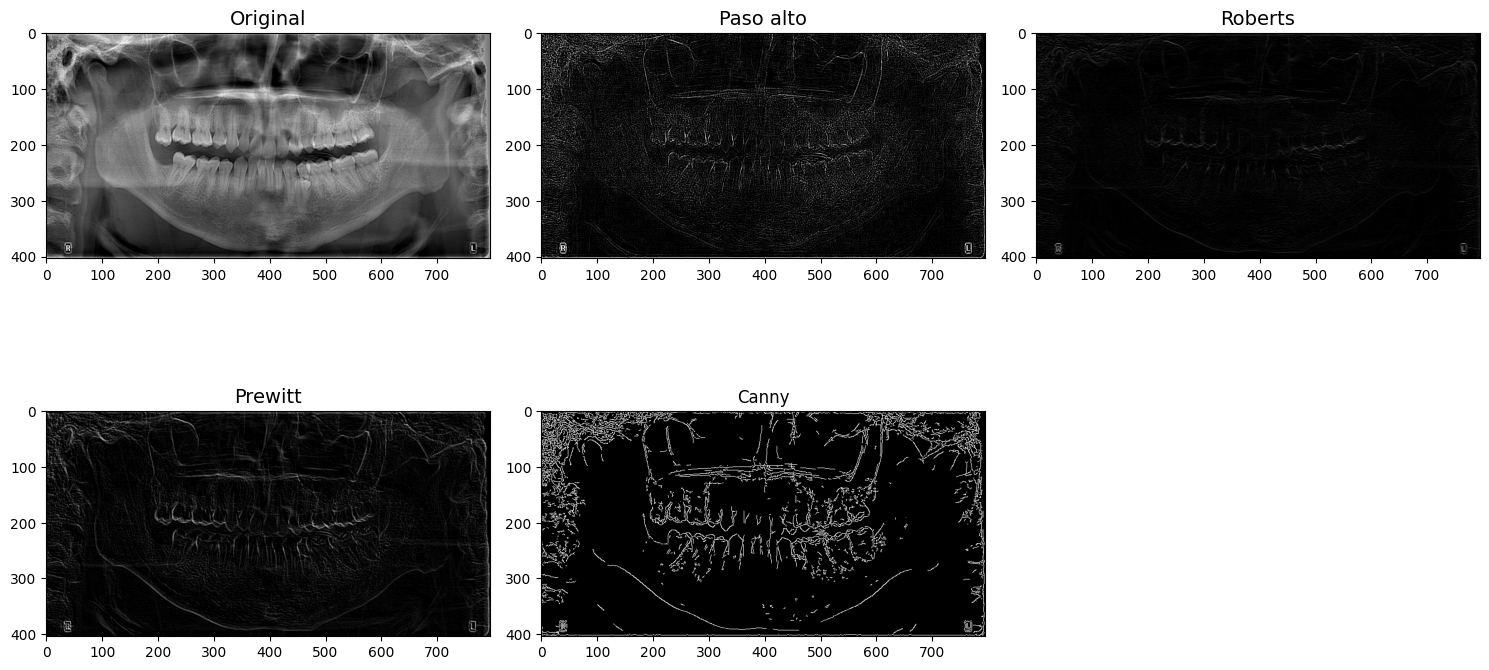

In [39]:
# Procesamos la imagen con los operadores de paso alto, Roberts, Prewitt y Canny.

# Operador de paso alto: Acentúa los detalles y bordes.
# Usamos un kernel de paso alto genérico.
kernel_paso_alto = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]])
paso_alto = cv2.filter2D(placa, -1, kernel_paso_alto)

# Operador de Roberts: Para detectar bordes diagonalmente.
kernel_roberts_x = np.array([[1, 0],
                             [0, -1]])
kernel_roberts_y = np.array([[0, 1],
                             [-1, 0]])
roberts_x = cv2.filter2D(placa, -1, kernel_roberts_x)
roberts_y = cv2.filter2D(placa, -1, kernel_roberts_y)
roberts_combinado = cv2.addWeighted(roberts_x, 0.5, roberts_y, 0.5, 0)

# Operador de Prewitt: Similar a Sobel, pero con diferente kernel.
kernel_prewitt_x = np.array([[-1, 0, 1],
                             [-1, 0, 1],
                             [-1, 0, 1]])
kernel_prewitt_y = np.array([[1, 1, 1],
                             [0, 0, 0],
                             [-1, -1, -1]])
prewitt_x = cv2.filter2D(placa, -1, kernel_prewitt_x)
prewitt_y = cv2.filter2D(placa, -1, kernel_prewitt_y)
prewitt_combinado = cv2.addWeighted(prewitt_x, 0.5, prewitt_y, 0.5, 0)

# Algoritmo de Canny: Detector de bordes muy conocido.
canny = cv2.Canny(placa, 110, 180)

# Visualización de las imágenes
plt.figure(figsize=(15, 8))

plt.subplot(231), plt.imshow(placa, cmap='gray'), plt.title('Original',  fontsize=14)
plt.subplot(232), plt.imshow(paso_alto, cmap='gray'), plt.title('Paso alto',  fontsize=14)
plt.subplot(233), plt.imshow(roberts_combinado, cmap='gray'), plt.title('Roberts',  fontsize=14)
plt.subplot(234), plt.imshow(prewitt_combinado, cmap='gray'), plt.title('Prewitt',  fontsize=14)
plt.subplot(235), plt.imshow(canny, cmap='gray'), plt.title('Canny')

plt.tight_layout()
plt.show()
